<a href="https://colab.research.google.com/github/ArinaWhyNot/myfirstrep/blob/main/Athlete_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи к Лекции 1

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns

In [49]:

df = pd.read_csv(open("athlete_events.csv"))
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


**Получение различной информации**

In [4]:
df.shape

(6269, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6269 entries, 40 to 61795
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      6269 non-null   int64  
 1   Name    6269 non-null   object 
 2   Sex     6269 non-null   object 
 3   Age     6269 non-null   float64
 4   Height  6269 non-null   float64
 5   Weight  6269 non-null   float64
 6   Team    6269 non-null   object 
 7   NOC     6269 non-null   object 
 8   Games   6269 non-null   object 
 9   Year    6269 non-null   float64
 10  Season  6269 non-null   object 
 11  City    6269 non-null   object 
 12  Sport   6269 non-null   object 
 13  Event   6269 non-null   object 
 14  Medal   6269 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 783.6+ KB


In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000
mean,16251.277556,25.439145,177.986601,73.995374,1988.102409
std,9088.642223,5.112300,10.833094,15.360281,22.936618
min,16.000000,13.000000,139.000000,32.000000,1896.000000
25%,8646.000000,22.000000,170.000000,63.000000,1976.000000
50%,15889.000000,25.000000,178.000000,73.000000,1992.000000
75%,24137.000000,28.000000,185.000000,83.000000,2006.000000
max,31634.000000,58.000000,223.000000,170.000000,2016.000000


**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

In [7]:
# Your code here
import pandas as pd
medal_counts = df.groupby(['Sex', 'Medal']).size().unstack(fill_value=0) #grouby - группировка данных на группы на основе значений, указанных в аргументе, size - подсчитывает количество строк по столбцам, unstack - преобразование длинного списка в краткую таблицу со значениями количества медалей по полу
print(medal_counts)


Medal  Bronze  Gold  Silver
Sex                        
F         690   727     679
M        1394  1401    1378




```
# Выбран кодовый формат
```

**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [8]:
# Your code here
gold_medals = df[df['Medal'] == 'Gold'] #датафрейм только с золотыми медалями
gold_counts = gold_medals['Team'].value_counts().reset_index() #value_counts - подсчитывает каждое уникальное значение, сколько раз каждая страна появляется в списке золотых медалистов, reset_index - преобразование в датафрейм с новыми индексами
gold_counts.columns = ['Team', 'Gold_Count']
top_country = gold_counts.iloc[0]
print(top_country['Team'], top_country['Gold_Count'])
#gold_counts.head(5)

United States 524


**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

In [9]:
# Your code here
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

pd.crosstab(df['Sex'], df['Sport'], margins=True)

Sport,Alpine Skiing,Archery,Athletics,Badminton,Baseball,Basketball,Beach Volleyball,Biathlon,Bobsleigh,Boxing,...,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling,All
Sex,,,,,,,,,,,,,,,,,,,,,
F,21,15,287,1,0,106,6,58,2,5,...,17,9,4,2,0,76,34,15,4,2096
M,29,10,564,14,50,151,9,54,48,149,...,14,25,4,7,2,97,125,75,183,4173
All,50,25,851,15,50,257,15,112,50,154,...,31,34,8,9,2,173,159,90,187,6269


**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

In [50]:
female_hockey = df[(df['Sex'] == 'F') & (df['Sport'] == 'Ice Hockey')]
mean = female_hockey['Age'].mean()
std = female_hockey['Age'].std()
print(f"Средний возраст: {mean}, стандартное отклонение: {std}")


Средний возраст: 24.42, стандартное отклонение: 4.360463907080283


**5. У какой страны было больше всего женщин, получивших бронзовую медаль?**

In [51]:
# Your code here
female_bronze = df[(df['Sex'] == 'F') & (df['Medal'] == 'Bronze')]

bronze_counts = female_bronze['Team'].value_counts().reset_index()
bronze_counts.columns = ['Team', 'Bronze_Count']
top_fem = bronze_counts.iloc[0]
print(top_fem['Team'], top_fem['Bronze_Count'])

bronze_counts.head(5)

United States 360


,Team,Bronze_Count
0,United States,360
1,Germany,226
2,Canada,196
3,Australia,186
4,Soviet Union,186


**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

               Gold  Silver  Bronze
Team                               
United States   524     311     243
Soviet Union    168     117     126
Italy           116     116     117


<Figure size 1000x600 with 0 Axes>

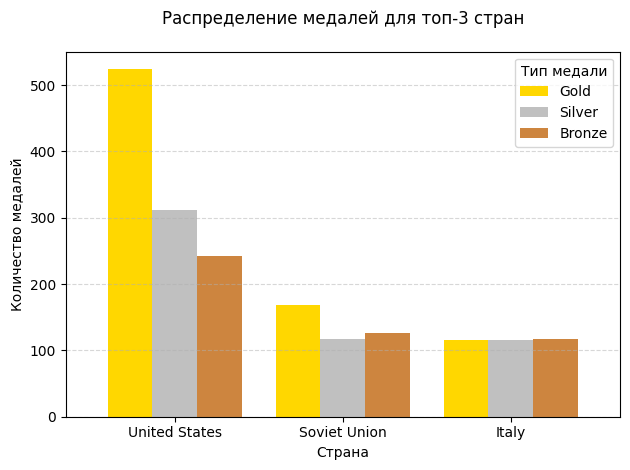

In [12]:
gold_counts = df[df['Medal'] == 'Gold']['Team'].value_counts().rename('Gold')
silver_counts = df[df['Medal'] == 'Silver']['Team'].value_counts().rename('Silver')
bronze_counts = df[df['Medal'] == 'Bronze']['Team'].value_counts().rename('Bronze')

medal_counts = pd.concat([gold_counts, silver_counts, bronze_counts], axis=1).fillna(0)
medal_counts = medal_counts.astype(int)

top_3 = medal_counts.sort_values('Gold', ascending=False).head(3)

print(top_3)

plt.figure(figsize=(10, 6))
top_3.plot(
    kind='bar',
    color=['gold', 'silver', 'peru'],
    width=0.8
)

plt.title('Распределение медалей для топ-3 стран', pad=20)
plt.xlabel('Страна')
plt.ylabel('Количество медалей')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Тип медали')
plt.tight_layout()
plt.show()

#Вывод:
#У США преобладает количество медалей всех типов, у СССР и Италии количество каждой из медалей практически одинаково

**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль(density или distplot)**

<ipython-input-22-acaa29e24247>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_silver['Weight'], hist=True, kde=True,


<Axes: xlabel='Weight', ylabel='Density'>

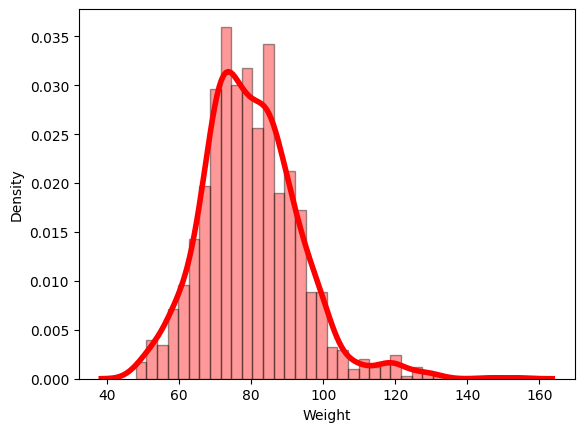

In [22]:
# Your code here
male_silver = df[(df['Sex'] == 'M') & (df['Medal'] == 'Silver')]
#male_silver.head(5)
sns.distplot(male_silver['Weight'], hist=True, kde=True,
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#Вывод:
#Распределение можно считать близко к нормальному. Распределение немного скошено вправо
#медиана графика - вес 80 => это средний вес мужчин, получивших серебряную медаль

**8. Постройте boxplot для возраста участника в зависимости от медали**



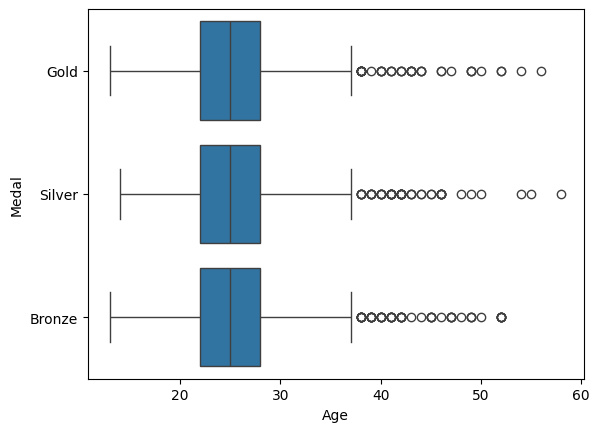

In [29]:
# Your code here

sns.boxplot(y="Medal", x="Age",
            data=df, order=['Gold', 'Silver', 'Bronze'], orient="h");

#Вывод:
#Медианный возраст для всех категории медалей - одинаковый (25 лет)
#Разброс возраста для Золотых и Бронзовых медалей совпадает, а для Серебренных минимальный возраст меньше, но незначительно
#Выбросы присутствуют для каждой категории медалей. Все выбросы имеют значение Превышения максимального возраста участников.
#При этом самый возрастной участник среди обладателей серебрянной медали
#Значительная разница между боксплотами не выявлена, значит возраст обладателей золотых, серебряных и бронзовых медалей
#не отличаются между собой

**9. Постройте pairplot для веса, возраста и роста участников от USA.**





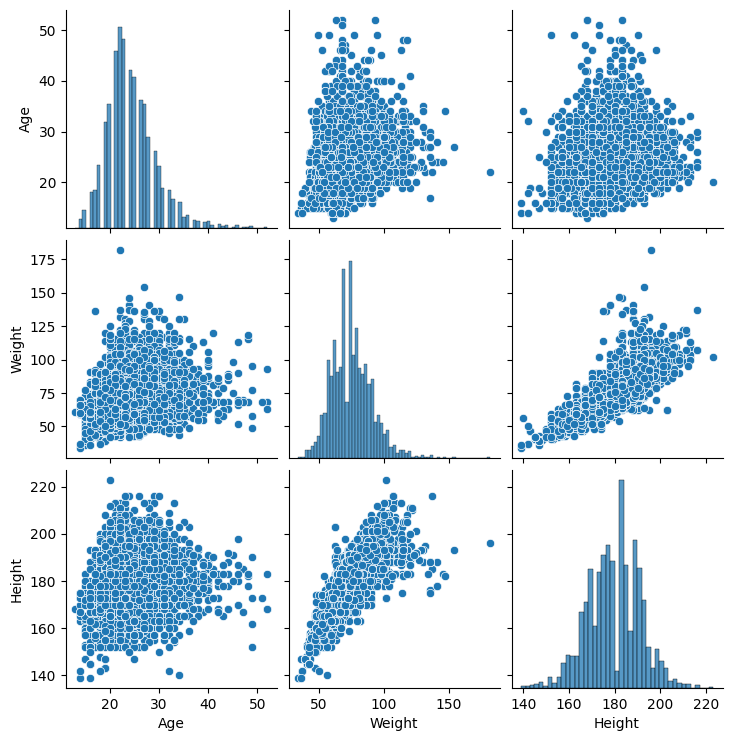

In [48]:
# Your code here
df_usa = df[(df['NOC'] == 'USA') & (df['Age']) & (df['Height']) & (df['Weight'])]
#df_usa.head()
sns.pairplot(df_usa[['Age', 'Weight', 'Height']]);

#Вывод: Линейная зависимость прослеживается только в паре Вес и Рост.
#Из этого можно сделать вывод, что только эти два показателя взаимосвязаны.
#При этом коэффицент линейной зависимости является положительным => чем больше рост, тем больше вес и наоборот